# **SVM - 3 DATASETS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# df = pd.read_csv('/content/breast-cancer.csv')


# df.drop(columns = 'id' , inplace = True)
# label = LabelEncoder()
# df['diagnosis'] = label.fit_transform(df['diagnosis'])


# X = df.iloc[: ,1:].values
# y = df. iloc[: , 0].values


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# plt.figure(figsize=(12, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.show()


In [ ]:
# df = pd.read_csv('/content/winequality-red (1).csv')

# def map_quality(value):
#     if value == 4:
#         return 0  # Low quality
#     elif  value == 5:
#         return 1  # Medium quality
#     elif value == 6:
#         return 2  # Good quality
#     else:
#         return 3  # Excellent quality

# df['quality'] = df['quality'].apply(map_quality)

# X = df.iloc[: ,:-1].values
# y = df. iloc[: , -1].values

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)



# plt.figure(figsize=(12, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.show()

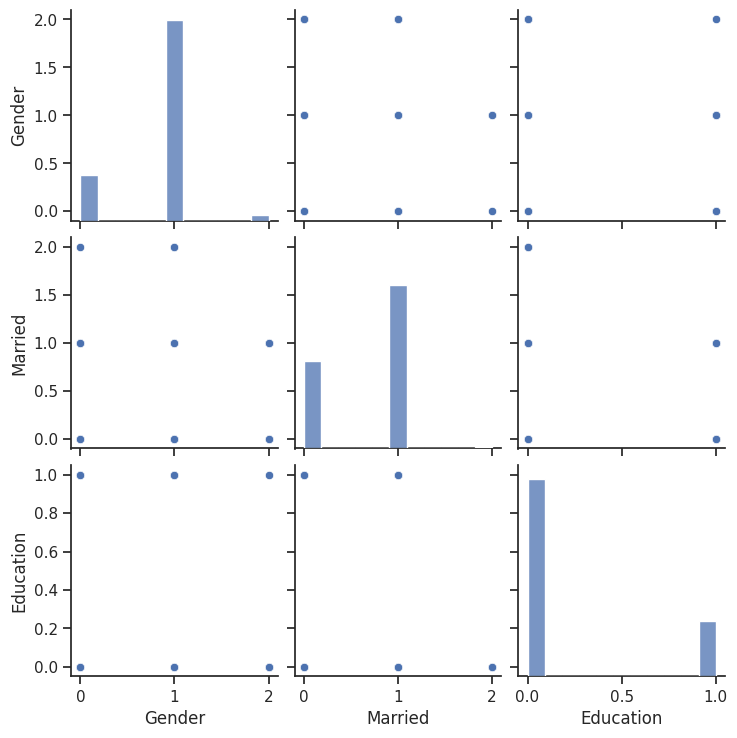

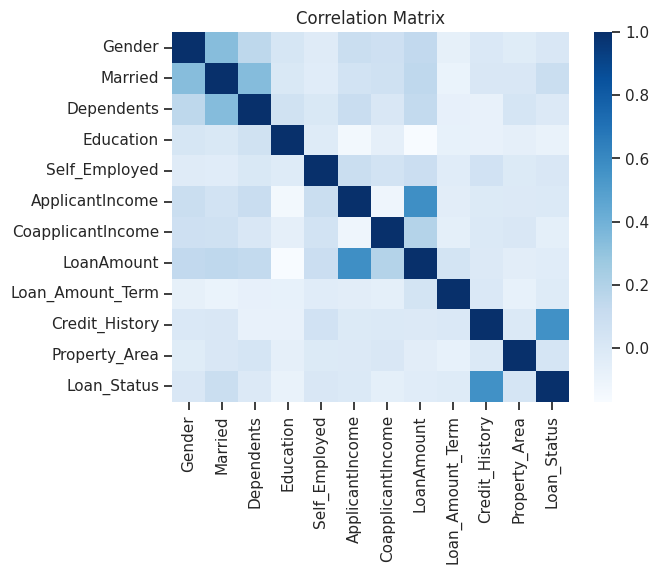

In [ ]:
df = pd.read_csv('/content/loan_sanction_train.csv')

df.drop(columns = 'Loan_ID' , inplace = True)

label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
  df[column] = label_encoder.fit_transform(df[column])

X = df.iloc[: , :-1].values
y = df. iloc[: , -1].values

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

sns.pairplot(df[['Gender','Married','Education']])
plt.show()

cor = df.corr()
sns.heatmap(cor,annot = False, cmap ='Blues')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear',C=0.1)  # poly , rbf - kernel trick , if C=0.1 then regularization
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:\n", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       120

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

Confusion Matrix:
 [[ 65   0]
 [  0 120]]
Accuracy:
 1.0


In [ ]:
X_2D = X[:, :2]  # Select first two features
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y, test_size=0.3, random_state=42)

# Train SVM on 2D data
svm_model_2D = SVC(kernel='linear')
svm_model_2D.fit(X_train_2D, y_train_2D)

SVC(kernel='linear')

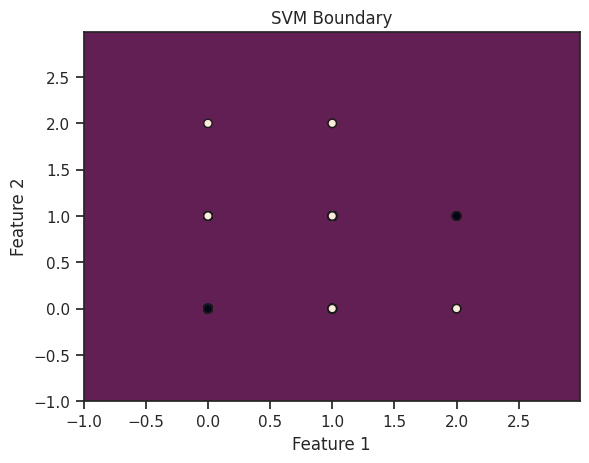

In [ ]:
def plot(X, y , model):
  xmin, xmax = X[: , 0].min() - 1,  X[: , 0].max() + 1
  ymin, ymax = X[: , 1].min() - 1,  X[: , 1].max() + 1
  xx , yy = np.meshgrid(np.arange(xmin, xmax, 0.01),np.arange(ymin, ymax, 0.01))
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z)
  plt.scatter(X[: , 0],X[: , 1],c=y,edgecolors='k')
  plt.title('SVM Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

plot(X_2D, y, svm_model_2D)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 65   0]
 [  0 120]]


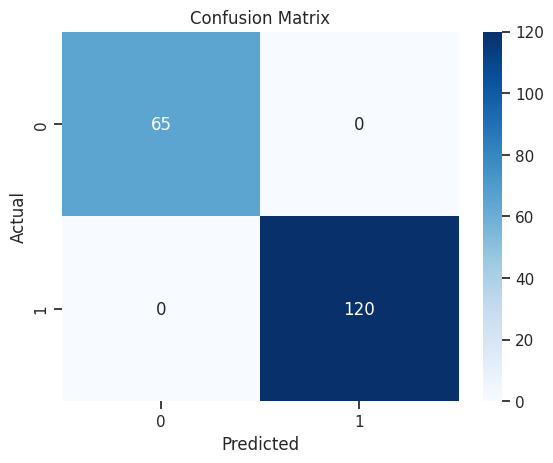

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svm_model,X_scaled,y,cv=5)
print(f"Cross Validation Accuracy:{np.mean(scores)*100:.2f}%")

Cross Validation Accuracy:100.00%
